In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [7]:
df = pd.read_csv('WineQuality.csv')

In [8]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


##### there are no categorical variables. each feature is a number. Regression problem. 
#### Given the set of values for features, we have to predict the quality of wine.
#### finding correlation of each feature with our target variable - quality

In [10]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.127766
volatile acidity       -0.391735
citric acid             0.233733
residual sugar          0.016464
chlorides              -0.119770
free sulfur dioxide    -0.048641
total sulfur dioxide   -0.185404
density                -0.173251
pH                     -0.063373
sulphates               0.270777
alcohol                 0.480738
Name: quality, dtype: float64


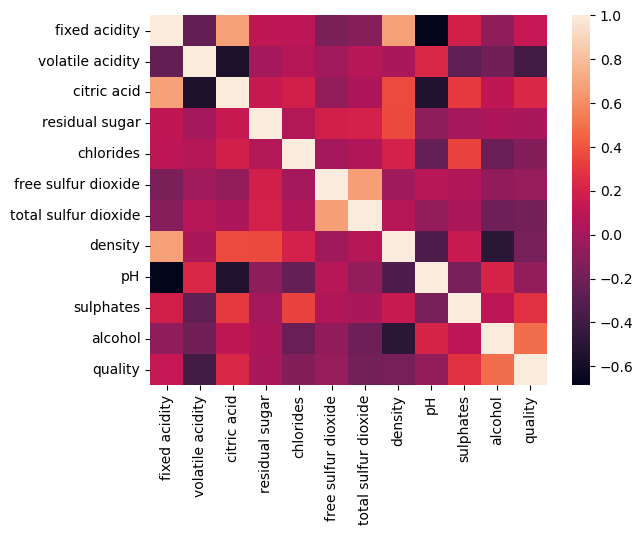

In [11]:
sns.heatmap(df.corr())
plt.show()

In [12]:
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

##### taking features with correlation more than 0.05 as input x and quality as target variable y

In [13]:
features = get_features(0.05)
print(features)
x = df[features]
y = df['quality']

['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [14]:
x

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1591,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1592,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1593,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1594,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [15]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1591    5
1592    6
1593    6
1594    5
1595    6
Name: quality, Length: 1596, dtype: int64

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3)

In [17]:
y_test.shape

(399,)

### fitting linear regression to training data

In [18]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

#### this gives the coefficients of the 10 features selected above.

In [19]:
regressor.coef_

array([ 3.25524263e-02, -1.11647933e+00, -3.56321901e-01, -1.27280869e+00,
       -1.50990032e-03, -1.76557595e+01, -4.49209853e-01,  8.81410678e-01,
        3.00039821e-01])

In [20]:
train_pred = regressor.predict(x_train)
train_pred

array([5.36262735, 6.0455248 , 6.37704645, ..., 6.31900633, 5.92219173,
       6.25688339])

In [23]:
from sklearn.metrics import mean_squared_error

test_pred = regressor.predict(x_test)
test_pred

array([4.98224279, 5.55264983, 6.50787496, 5.24803289, 6.40101088,
       6.41423262, 5.42988208, 6.1804428 , 5.04784628, 4.85348707,
       5.40966404, 5.1359994 , 5.33769743, 5.30239795, 6.44294232,
       5.03812492, 5.13528242, 5.75263035, 5.28566518, 5.25562678,
       6.23127666, 6.69207852, 5.78330571, 5.52286247, 5.42591385,
       5.56802076, 4.85348707, 5.11551512, 6.04277101, 6.35222229,
       5.81399567, 5.08523847, 4.97167228, 5.43821889, 6.15790337,
       5.65761909, 6.06260368, 5.27875505, 5.56467601, 4.94429931,
       5.41077879, 5.22072106, 5.22525473, 6.03602124, 5.82650167,
       5.18207479, 5.75595881, 5.83786086, 5.57337562, 6.22002025,
       4.98584166, 5.30644459, 5.6074097 , 4.6845693 , 5.14766763,
       4.78434794, 6.32484153, 5.65630772, 6.07618149, 5.5347906 ,
       5.38628931, 4.92240014, 6.14168126, 5.59104378, 4.99297579,
       4.95243522, 5.4193248 , 5.26558021, 6.42441301, 5.07127635,
       6.19497619, 5.71028361, 5.58262028, 6.17079625, 4.95537

In [24]:
train_rmse = mean_squared_error(train_pred, y_train) ** 0.5
train_rmse

0.6469968561267716

In [25]:
test_rmse = mean_squared_error(test_pred, y_test) ** 0.5
test_rmse

0.6329179303437428

### rounding off the predicted values for test set

In [26]:
predicted_data = np.round_(test_pred)
predicted_data

array([5., 6., 7., 5., 6., 6., 5., 6., 5., 5., 5., 5., 5., 5., 6., 5., 5.,
       6., 5., 5., 6., 7., 6., 6., 5., 6., 5., 5., 6., 6., 6., 5., 5., 5.,
       6., 6., 6., 5., 6., 5., 5., 5., 5., 6., 6., 5., 6., 6., 6., 6., 5.,
       5., 6., 5., 5., 5., 6., 6., 6., 6., 5., 5., 6., 6., 5., 5., 5., 5.,
       6., 5., 6., 6., 6., 6., 5., 5., 6., 5., 5., 6., 6., 5., 5., 5., 5.,
       6., 7., 6., 6., 5., 6., 5., 5., 5., 6., 6., 6., 5., 6., 6., 6., 6.,
       6., 5., 6., 5., 6., 6., 7., 5., 5., 6., 5., 5., 5., 6., 6., 5., 6.,
       6., 5., 6., 6., 6., 6., 6., 5., 5., 5., 6., 5., 6., 6., 5., 6., 5.,
       5., 7., 7., 6., 5., 5., 6., 6., 6., 6., 6., 5., 5., 5., 6., 5., 5.,
       7., 6., 5., 6., 6., 6., 6., 6., 5., 6., 5., 5., 5., 6., 6., 5., 6.,
       6., 7., 6., 5., 6., 6., 6., 5., 5., 5., 7., 5., 5., 5., 5., 6., 5.,
       5., 6., 6., 6., 6., 5., 5., 5., 5., 6., 5., 6., 5., 5., 5., 6., 5.,
       6., 6., 5., 5., 6., 5., 6., 7., 6., 6., 6., 6., 5., 6., 6., 7., 7.,
       6., 6., 7., 5., 6.

In [27]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Mean Absolute Error: 0.5035500150166764
Mean Squared Error: 0.40058510655060686
Root Mean Squared Error: 0.6329179303437428


In [28]:
coeffecients = pd.DataFrame(regressor.coef_,features)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
fixed acidity,0.032552
volatile acidity,-1.116479
citric acid,-0.356322
chlorides,-1.272809
total sulfur dioxide,-0.001510
density,-17.655760
pH,-0.449210
sulphates,0.881411
alcohol,0.300040


###These numbers mean that holding all other features fixed, a 1 unit increase in suplhates will lead to an increase of 0.8 in Quality of wine, and similarly for the other features
#These numbers mean that holding all other features fixed, a 1 unit increase in volatile acidity will lead to a decrease of 0.99 in Quality of wine, and simil